## ANALISIS MUESTRAL EN TRANSPORTE

In [6]:
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine, inspect
import configparser

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')
conf = config['dtondo']

In [10]:
path_conexion = 'mysql+pymysql://{}:{}@{}:{}/{}'.format(conf['DB_USER'], conf['DB_PASS'], conf['DB_HOST'], conf['DB_PORT'], conf['DB_NAME'])
dbc = create_engine(path_conexion)

In [11]:
inspector = inspect(dbc)
inspector.get_table_names()

['fs_asignacion_producto',
 'fs_bombas',
 'fs_equipo',
 'fs_tanques',
 'fs_usuarios_fuelsentry',
 'fs_vehiculos',
 'sis_historial_2018_1',
 'sis_historial_2018_10',
 'sis_historial_2018_11',
 'sis_historial_2018_12',
 'sis_historial_2018_2',
 'sis_historial_2018_3',
 'sis_historial_2018_4',
 'sis_historial_2018_5',
 'sis_historial_2018_6',
 'sis_historial_2018_7',
 'sis_historial_2018_8',
 'sis_historial_2018_9',
 'sis_historial_2019_1',
 'sis_historial_2019_10',
 'sis_historial_2019_11',
 'sis_historial_2019_12',
 'sis_historial_2019_2',
 'sis_historial_2019_3',
 'sis_historial_2019_4',
 'sis_historial_2019_5',
 'sis_historial_2019_6',
 'sis_historial_2019_7',
 'sis_historial_2019_8',
 'sis_historial_2019_9',
 'sis_historial_2020_1',
 'sis_historial_2020_2',
 'sis_historial_2020_3',
 'sis_historial_2020_4',
 'sis_historial_2020_5',
 'sis_transa_2018_1',
 'sis_transa_2018_10',
 'sis_transa_2018_11',
 'sis_transa_2018_12',
 'sis_transa_2018_2',
 'sis_transa_2018_3',
 'sis_transa_2018_4'

In [12]:
veh = pd.read_sql_table('fs_vehiculos', dbc)

In [13]:
veh

,id_vehiculo,id_equipo,vehiculo,departamento,limite,odometro_inicio,odometro_fin,cargas_max_dia,autorizacion,cantidad_total,cargas_hoy,cargas_hasta_hoy,ultima_fecha
0,2,333333,MDAwMDAx,0001,9,193958,193958,99,0,00000.000,01,000,2018-12-20
1,3,333333,MDAwMjM5,0001,9,079345,079345,99,0,00000.000,02,000,2018-12-20
2,4,333333,MDAwMjcw,0001,9,842409,842409,99,0,00000.000,01,000,2018-12-20
3,5,333333,MDAwMjUy,0001,9,287596,287596,99,0,00000.000,02,000,2018-12-20
4,6,333333,MDAwMjM1,0001,9,235878,235878,99,0,00000.000,01,000,2018-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50622,101045,515,MDI1MTIy,0001,9,000000,000000,00,0,00000.000,00,000,2020-06-13
50623,101043,372,MDAwNTA3,0008,9,000000,000000,00,0,00093.547,01,001,2020-06-12
50624,101044,792,MDAwMDk5,0000,7,000000,000000,01,0,00000.000,00,000,2020-06-12
50625,101048,625,MzAwMDA1,0001,9,000000,000000,00,0,00000.000,00,000,2020-06-13


In [14]:
tanks = pd.read_sql_table('fs_tanques', dbc)

In [15]:
tanks

,id_tanque,id_equipo,tanque,producto,capacidad,log_interval,nivel_alarma
0,101525,669,B,1,0010000.1,0030,0
1,101833,764,5,1,0008000.0,0030,000003200
2,101496,662,1,0,0050000.0,0030,0
3,101495,661,1,0,0025000.0,0030,0
4,101522,669,8,1,0010000.1,0030,0
...,...,...,...,...,...,...,...
1556,102053,446,1,2,0010000.1,0010,0
1557,102054,446,2,2,0061481.0,0060,0
1558,102055,446,3,2,0010000.1,0010,0
1559,102047,821,1,1,0010000.0,0060,0


In [50]:
transa = pd.read_sql_table('sis_transa_2019_11', dbc)

In [75]:
transa[:5].loc[1, ['odometro','baja']]

odometro    000000
baja             0
Name: 1, dtype: object

In [78]:
sites = pd.read_sql_table('fs_equipo', dbc)

In [79]:
sites[:2]

,id_equipo,id_empresa,current_firmware,delay_ue,geo_latitude,geo_longitude
0,000585,25,V60403bQ4830361,0,None,None
1,000749,210,V80604bQ0428b17,0,,


In [80]:
sites['id_equipo'] = sites['id_equipo'].astype(int)
sites.set_index('id_equipo', inplace=True)
sites.head(3)

,id_empresa,current_firmware,delay_ue,geo_latitude,geo_longitude
id_equipo,,,,,
585,25,V60403bQ4830361,0,None,None
749,210,V80604bQ0428b17,0,,
584,1000,V60403bQ4830361,0,None,None


In [84]:
transa['id_equipo'] = transa['id_equipo'].astype(int)
transa.head(1)

,id_transaccion,id_vehiculo,id_usuario,id_equipo,producto,id_bomba,id_tanque,departamento,fecha,hora,...,volume_start,volume_stop,temp_start,temp_stop,local_price,geo_latitud,geo_longitud,geo_status,veh_efficiency,id_empresa
0,3844,59719,5905,477,1,828,1011,0000,2019-11-01,00:02:56,...,000000.000,003666.132,000.0,021.3,00000000,000.000000,0000.000000,N,0000.00,100


In [ ]:
transa = transa.join(other=sites['id_empresa'], on='id_equipo', how='left')

In [87]:
transa.columns

Index(['id_transaccion', 'id_vehiculo', 'id_usuario', 'id_equipo', 'producto',
       'id_bomba', 'id_tanque', 'departamento', 'fecha', 'hora', 'cantidad',
       'acum_vehiculo', 'acum_usuario', 'odometro', 'km_transaccion',
       'codigo_error', 'valor', 'campovar1', 'campovar2', 'baja', 'fecha_stop',
       'hora_stop', 'volume_start', 'volume_stop', 'temp_start', 'temp_stop',
       'local_price', 'geo_latitud', 'geo_longitud', 'geo_status',
       'veh_efficiency', 'id_empresa'],
      dtype='object')

In [89]:
transa.dtypes

id_transaccion             int64
id_vehiculo                int64
id_usuario                 int64
id_equipo                  int64
producto                  object
id_bomba                   int64
id_tanque                  int64
departamento              object
fecha             datetime64[ns]
hora                      object
cantidad                  object
acum_vehiculo             object
acum_usuario              object
odometro                  object
km_transaccion            object
codigo_error              object
valor                    float64
campovar1                 object
campovar2                 object
baja                       int64
fecha_stop        datetime64[ns]
hora_stop                 object
volume_start              object
volume_stop               object
temp_start                object
temp_stop                 object
local_price               object
geo_latitud               object
geo_longitud              object
geo_status                object
veh_effici

In [106]:
transa['cant'] = transa['cantidad'].astype(float)

In [113]:
transa = transa[transa['cant']>0].copy()

### Volumen de Litros Consumidos por Empresa

In [159]:
import matplotlib.pyplot as plt

In [147]:
transa_sum = transa.groupby(['id_empresa'])['cant'].sum()

In [276]:
cons_empresa = transa_sum.describe()
cons_empresa

count       188.000000
mean      88181.217303
std      134409.972158
min           4.434000
25%        9581.174250
50%       39362.874000
75%       91702.700250
max      744830.950000
Name: cant, dtype: float64

In [171]:
range(0, 100000, 100)

range(0, 100000, 100)

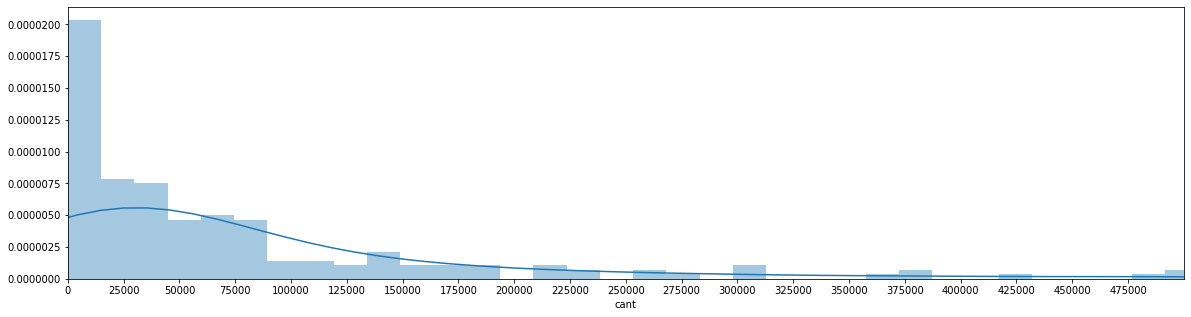

In [176]:
plt.figure(figsize=(20, 5))
plt.xlim(0,500000)
plt.xticks(range(0, 500000, 25000))
sns.distplot(transa_sum, bins=50)

### Volumen de Litros Consumidos por Sitio

In [177]:
transa_sum_site = transa.groupby(['id_equipo'])['cant'].sum()
transa_sum_site.describe()

count       283.000000
mean      58579.748597
std       88793.080860
min           1.766000
25%        6982.313000
50%       28902.805000
75%       69694.152000
max      744830.950000
Name: cant, dtype: float64

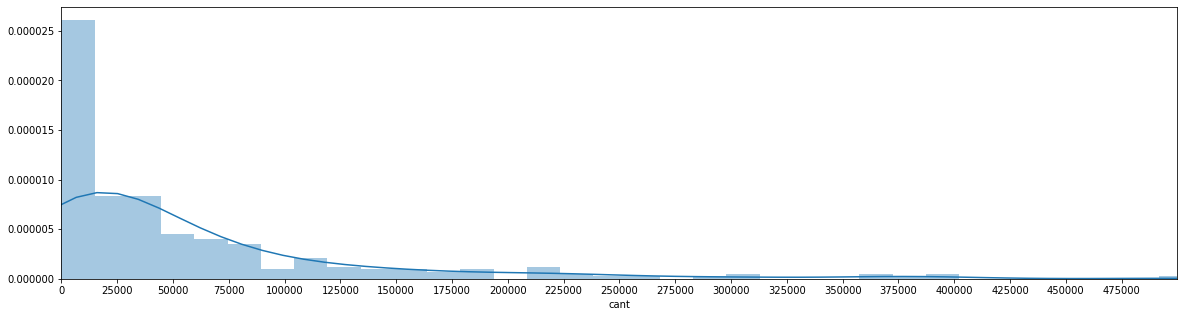

In [178]:
plt.figure(figsize=(20, 5))
plt.xlim(0,500000)
plt.xticks(range(0, 500000, 25000))
sns.distplot(transa_sum_site, bins=50)

### Vehiculos por Empresa

In [184]:
veh['id_equipo'] = veh['id_equipo'].astype(int)
veh = veh.join(other=sites['id_empresa'], on='id_equipo', how='left')

In [204]:
veh = veh[veh['id_empresa'].notna()]

In [205]:
veh.shape

(49909, 14)

In [282]:
veh_count_emp = veh.groupby(['id_equipo', 'id_empresa'])['id_vehiculo'].count()
veh_count_emp2 = veh_count_emp.groupby(['id_empresa']).max()
veh_description = veh_count_emp2.describe()
veh_description

count     276.000000
mean       83.474638
std       136.286501
min         1.000000
25%        14.000000
50%        40.500000
75%        85.500000
max      1201.000000
Name: id_vehiculo, dtype: float64

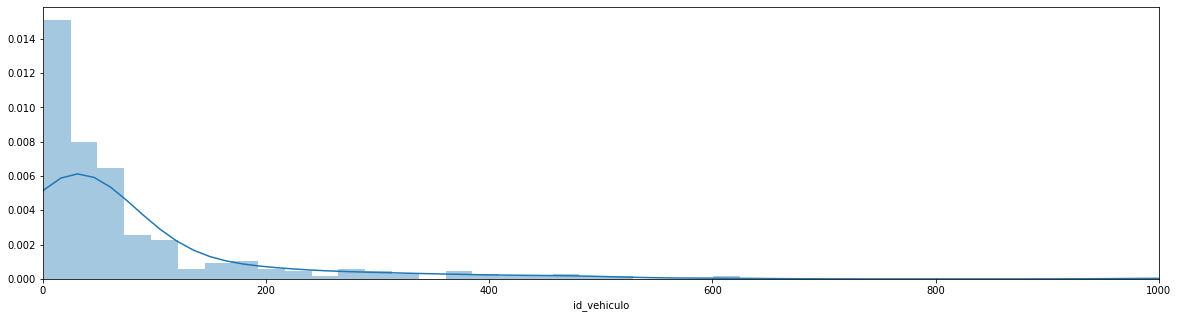

In [261]:
plt.figure(figsize=(20,5))
plt.xlim(0,1000)
sns.distplot(veh_count_emp2)